In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# Load the dataset
file_path = "C:\\Users\\HP\\Downloads\\insurance.csv"
df = pd.read_csv(file_path)

In [3]:
# Handle missing values
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_11332\1780937957.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11332\1780937957.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [4]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [6]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_scaled[:, :-1], data_scaled[:, -1], test_size=0.2, random_state=42)

In [7]:
# Use KMeans for feature extraction
num_clusters = 45 
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans.fit(X_train)

KMeans(n_clusters=45, n_init=10, random_state=42)

In [8]:
# Optimize RBF transformation
gamma_val = 0.08  
X_train_rbf = rbf_kernel(X_train, kmeans.cluster_centers_, gamma=gamma_val)
X_test_rbf = rbf_kernel(X_test, kmeans.cluster_centers_, gamma=gamma_val)

In [9]:
# Train Kernel Ridge Regression with RBF kernel
model = KernelRidge(kernel='rbf', gamma=0.08, alpha=0.001)  
model.fit(X_train_rbf, y_train)

KernelRidge(alpha=0.001, gamma=0.08, kernel='rbf')

In [10]:
# Make predictions
train_predictions = model.predict(X_train_rbf)
test_predictions = model.predict(X_test_rbf)

In [11]:
# Define file path
file_path = "C:\\Users\\HP\\OneDrive\\Desktop\\Actual_vs_Predicted.csv"

# Check if the file already exists and delete it
if os.path.exists(file_path):
    os.remove(file_path)
    print("Old file deleted successfully.")

# Create a DataFrame to store actual vs predicted values
results_df = pd.DataFrame({
    "Actual": y_test,  
    "Predicted": test_predictions  
})

# Save to CSV
results_df.to_csv(file_path, index=False)
print("New CSV file saved successfully at:", file_path)


New CSV file saved successfully at: C:\Users\HP\OneDrive\Desktop\Actual_vs_Predicted.csv


In [12]:
# Compute error metrics
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_tse = np.sum((y_train - train_predictions) ** 2)
test_tse = np.sum((y_test - test_predictions) ** 2)
train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

In [13]:
# Calculate errors for each data point
errors = y_test - test_predictions
squared_errors = errors ** 2

In [14]:
# Create a DataFrame to display results (first 10 values)
results_df = pd.DataFrame({
    'Actual': y_test[:10],
    'Predicted': test_predictions[:10],
    'Error': errors[:10],
    'Squared Error': squared_errors[:10]
})

print(results_df.to_string(index=False))
print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

   Actual  Predicted     Error  Squared Error
-0.344914  -0.289721 -0.055193       0.003046
-0.660713  -0.716750  0.056037       0.003140
 1.326718   1.411583 -0.084865       0.007202
-0.327829  -0.277708 -0.050121       0.002512
 1.691784   1.235852  0.455932       0.207874
-0.721505  -0.731529  0.010024       0.000100
-0.921325  -0.840793 -0.080532       0.006485
 0.077660   0.095092 -0.017432       0.000304
-0.787891  -0.843820  0.055929       0.003128
-0.248316  -0.143990 -0.104326       0.010884
Training Mean Squared Error: 0.1301400892265674
Testing Mean Squared Error: 0.15061467326595315
Training R2 Score: 0.8678680098819133
Testing R2 Score: 0.857831425205016


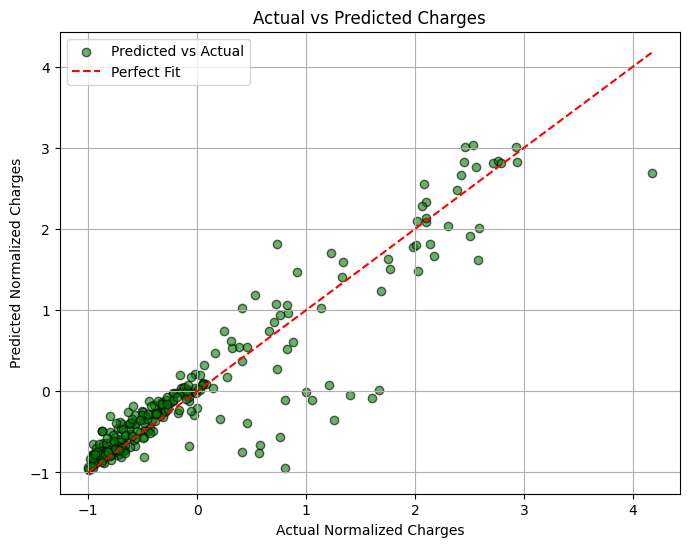

In [15]:
#Scatter Plot: Actual vs Predicted Charges
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions, alpha=0.6, color='green', edgecolors='black', label='Predicted vs Actual')

# Corrected Perfect Fit Line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Fit')

plt.xlabel("Actual Normalized Charges")
plt.ylabel("Predicted Normalized Charges")
plt.title("Actual vs Predicted Charges")
plt.legend()
plt.grid(True)  # Optional: Remove grid if necessary
plt.show()


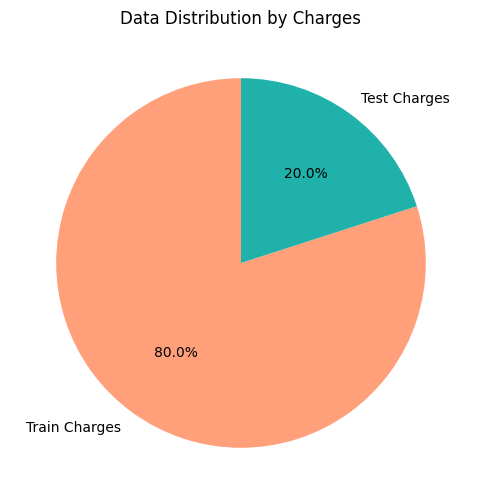

In [16]:
# Pie chart: Training and testing data distribution
train_size = len(y_train)
test_size = len(y_test)

labels = ['Train Charges', 'Test Charges']
sizes = [train_size, test_size]
colors = ['#FFA07A', '#20B2AA']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Data Distribution by Charges")
plt.show()

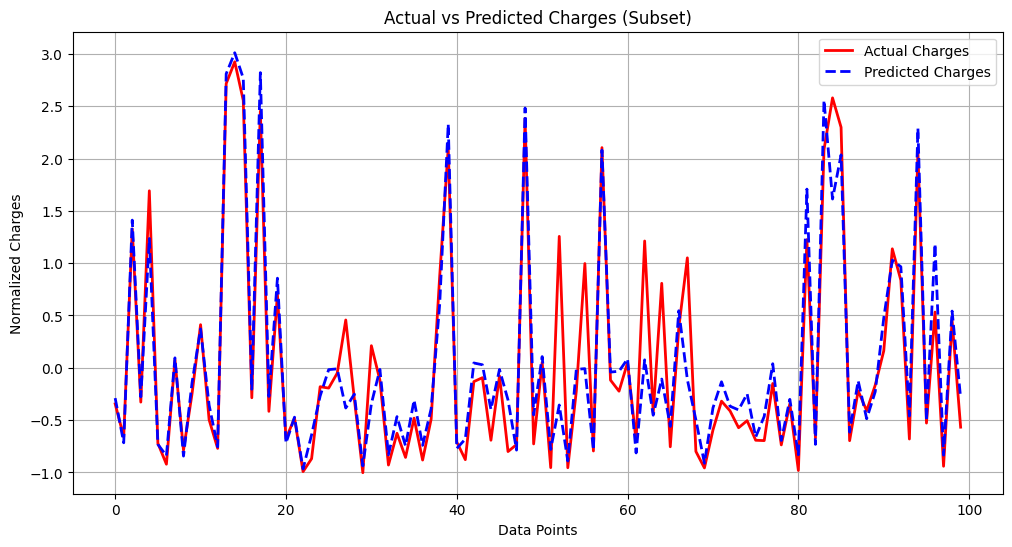

In [17]:
# Line plot: Actual vs Predicted Charges (Subset)
subset_size = min(100, len(y_test))
indices = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = test_predictions[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_subset, label='Actual Charges', color='red', linewidth=2)
plt.plot(indices, y_pred_subset, label='Predicted Charges', color='blue', linestyle='dashed', linewidth=2)
plt.title("Actual vs Predicted Charges (Subset)")
plt.xlabel("Data Points")
plt.ylabel("Normalized Charges")
plt.legend()
plt.grid(True)
plt.show()

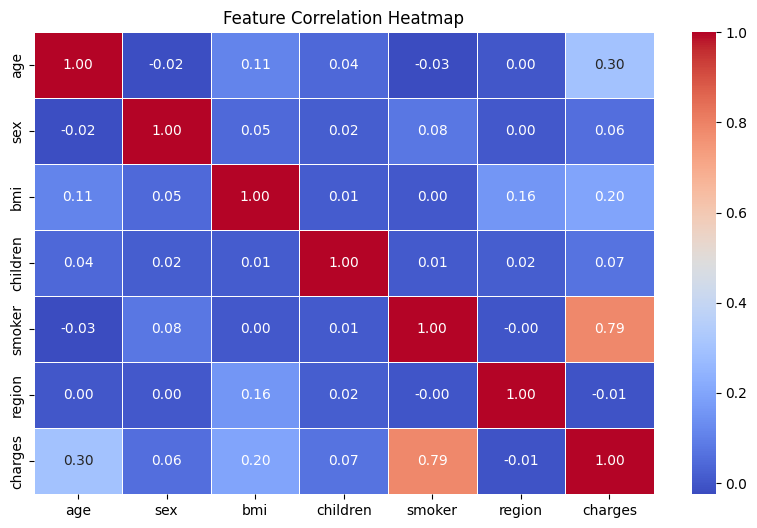

In [18]:
#Feature Correlation Heatmap

# Ensure categorical columns are encoded before computing correlation
df_encoded = df.copy()

# Encode categorical columns if not already encoded
categorical_columns = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Title of heatmap
plt.title("Feature Correlation Heatmap")
plt.show()